In [14]:
import numpy as np
import matplotlib.pyplot as plt


#initialisation
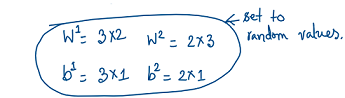

In [ ]:
def initialise(in_neuron,hidden_neuron,out_neuron):
  w1=np.random.rand(hidden_neuron,in_neuron)-.5
  w2=np.random.rand(out_neuron,hidden_neuron)-.5
  b1=np.zeros((hidden_neuron,1))#np.random.rand(hidden_neuron,1)
  b2=np.zeros((out_neuron,1))
  return w1,b1,w2,b2

In [46]:
def ReLU(z):
  return np.maximum(0,z)
def linear(z):
  return z
def linearPrime(z):
  return 1
def ReLUPrime(z):
  a=ReLU(z)
  return a>0

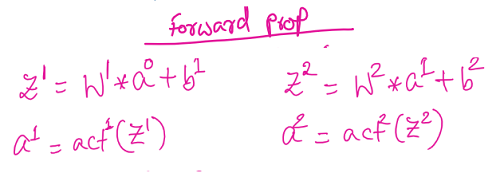

In [47]:
def forwardProp(a0,w1,b1,w2,b2):
  z1=np.dot(w1,a0)+b1
  a1=ReLU(z1)
  z2=np.dot(w2,a1)+b2
  a2=linear(z2)
  return z1,a1,z2,a2



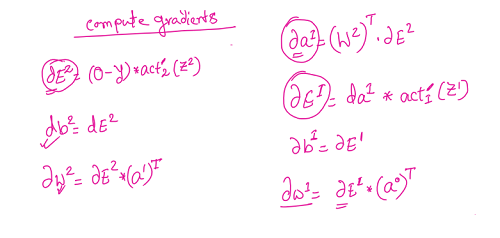

In [48]:
def computeGradient(a2,y,z2,a1,w2,z1,a0):
  de2=(a2-y)*linearPrime(z2)
  db2=de2
  dw2=np.dot(de2,a1.T)
  da1=np.dot(w2.T,de2)
  de1=da1*ReLUPrime(z1)
  db1=de1
  dw1=np.dot(de1,a0.T)
  return dw1,db1,dw2,db2

In [50]:
a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)
w1,b1,w2,b2=initialise(2,3,2)
z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
print(dw1)
print(db1)
print(dw2)
print(db2)


[[0.         0.        ]
 [0.         0.        ]
 [0.05764344 0.05764344]]
[[ 0.        ]
 [-0.        ]
 [ 0.11528688]]
[[ 0.          0.          0.06160477]
 [ 0.          0.         -0.07574967]]
[[ 0.45732186]
 [-0.56232623]]


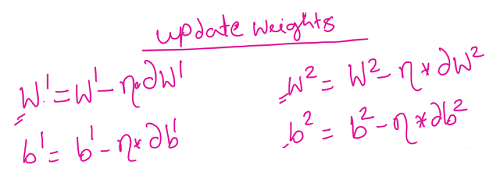

In [52]:
def updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta):
  w1=w1-eta*dw1
  b1=b1-eta*db1
  w2=w2-eta*dw2
  b2=b2-eta*db2
  return w1,b1,w2,b2

In [ ]:
eta=0.1
epoch=100

a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2=initialise(2,10,2)

for i in range(epoch):
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
  w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)
  cost=np.sum((a2-y)**2)*.5
  print(a2)
  print(cost)


In [ ]:
x_input=np.random.uniform(-1,1,(1000,2))
print(x_input)
rm=[[-1,0],
    [0,1]]
x_ground=np.dot(rm,x_input.T).T
print(x_ground)


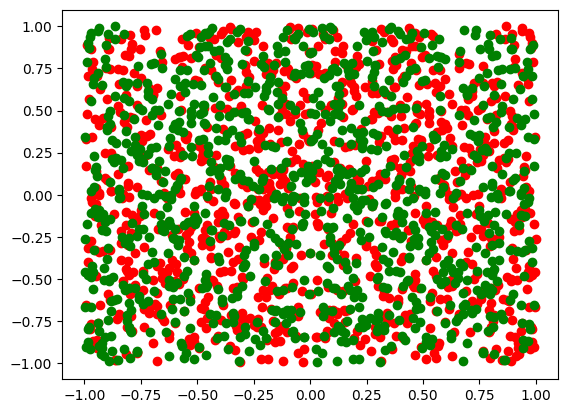

In [119]:
plt.scatter(x_input[:,0],x_input[:,1],c='RED')
plt.scatter(x_ground[:,0],x_ground[:,1],c='GREEN')
plt.show()

In [ ]:
eta=0.1
epoch=100

a0=np.array([0.5,0.5]).reshape(2,1)
y=np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2=initialise(2,10,2)

for i in range(epoch):
  cost=0;
  for j in range(1000):
    a0=x_input[j,:].T.reshape(2,1)
    y=x_ground[j,:].T.reshape(2,1)
    z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
    dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
    w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)
    cost=cost+np.sum((a2-y)**2)*.5
  print(cost)


In [ ]:
test_x=np.arange(0,1,.01)
test_y=test_x**2

test=np.column_stack([test_x,test_y])
print(test)

In [ ]:
plt.scatter(test_x,test_y)
plt.show()

In [100]:
n=test.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=test[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  #print(a2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])


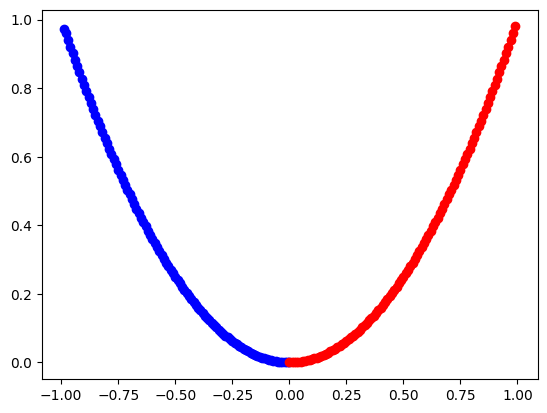

In [102]:
plt.scatter(o_x,o_y,c="blue")
plt.scatter(test[:,0],test[:,1],c="red")
plt.show()

In [103]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive


In [104]:
import pandas as pd
xtest = pd.read_csv('/content/gdrive/MyDrive/file.csv')
xtest=np.array(xtest)

(18154, 2)


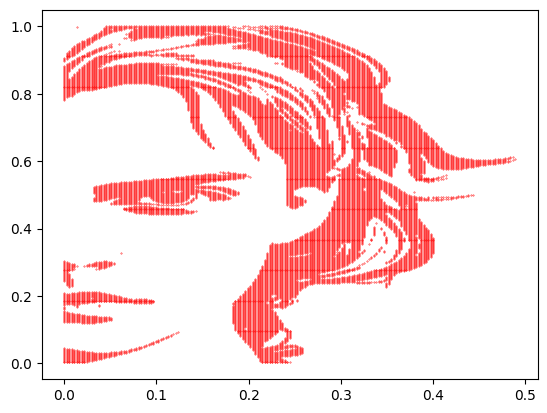

In [124]:
print(xtest.shape)
plt.scatter(xtest[:,0],xtest[:,1],s=.1,c='RED')

In [125]:
n=xtest.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=xtest[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  #print(a2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])


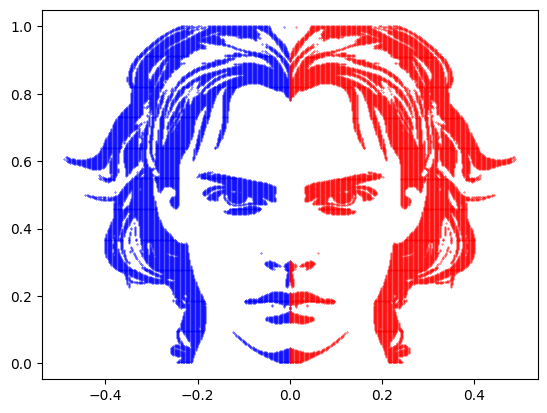

In [126]:
plt.scatter(o_x,o_y,s=.1,c="blue")
plt.scatter(xtest[:,0],xtest[:,1],s=.1,c="red")
plt.show()